In [ ]:
!pip install pyLDAvis==2.1.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97718 sha256=598b47092ad9d716962804333fbc30feaa411a4723a1e82d5bbed7775f257b67
  Stored in directory: /root/.cache/pip/wheels/d9/93/d6/16c95da19c32f037fd75135ea152d0df37254c25cd1a8b4b6c
Successfully built pyLDAvis


In [ ]:
!pip install --upgrade tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import pandas as pd
import numpy as np


import string
import re
from pprint import pprint

# NLTK

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) #this depends on each language
stop_words.add("rs")
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization


# Plotting tools
# import pyLDAvis
# import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


In [ ]:
import spacy
from spacy.cli.download import download
download(model="en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
df_2012 = pd.read_csv("/content/drive/MyDrive/Economic Times/2012_combined.csv")
df_2013 = pd.read_csv("/content/drive/MyDrive/Economic Times/2013_combined.csv")
df_2014 = pd.read_csv("/content/drive/MyDrive/Economic Times/2014_combined.csv")
df_2015 = pd.read_csv("/content/drive/MyDrive/Economic Times/2015_combined.csv")
df_2016 = pd.read_csv("/content/drive/MyDrive/Economic Times/2016_combined.csv")
df_2017 = pd.read_csv("/content/drive/MyDrive/Economic Times/2017_combined.csv")
df_2018 = pd.read_csv("/content/drive/MyDrive/Economic Times/2018_combined.csv")
df_2019 = pd.read_csv("/content/drive/MyDrive/Economic Times/2019_combined.csv")
df_2020 = pd.read_csv("/content/drive/MyDrive/Economic Times/2020_combined.csv")
df_2021 = pd.read_csv("/content/drive/MyDrive/Economic Times/2021_combined.csv")
df_2022 = pd.read_csv("/content/drive/MyDrive/Economic Times/2022_combined.csv")
df_2023 = pd.read_csv("/content/drive/MyDrive/Economic Times/2023_combined.csv")


In [ ]:
results = [df_2012, df_2013, df_2014,  df_2015, df_2016, df_2017, df_2018, df_2019, df_2020 , df_2021,df_2022,df_2023]
final_df_2019 = pd.concat(results)
final_df_2019.dtypes


Unnamed: 0        int64
Headline         object
Summary          object
Content          object
Category         object
Date and Time    object
dtype: object

In [ ]:
df_2019 = final_df_2019[['Headline','Summary','Content','Category','Date and Time']]

In [ ]:
df_2019.rename(columns = {'Date and Time':'Date_Time'}, inplace = True)

<ipython-input-10-ed13662b7d58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019.rename(columns = {'Date and Time':'Date_Time'}, inplace = True)


In [ ]:
df_2019['Category'] = df_2019['Category'].str.split(' › ')


<ipython-input-11-0983de4c6b06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['Category'] = df_2019['Category'].str.split(' › ')


In [ ]:
df_2019.head()

,Headline,Summary,Content,Category,Date_Time
0,How & why Nandan Nilekani will define India in...,This year will be make or break for him. Nilek...,"Nandan Nilekani 56 years, Chairperson of UIDAI...","[Business News, News, Company, Corporate Trends]","Jan 01, 2012, 04:38 AM"
1,12 commandments for economists to improve thei...,2011 was another year that did little to impro...,2011 was another year that did little to impro...,"[Business News, News, Company, Corporate Trends]","Dec 31, 2011, 09:27 PM"
2,How & why Bobby Jindal will define India in 2012,Because he has a shot at becoming the vice-pre...,"Bobby Jindal (NRI) 40 years, Governor , Lou...","[Business News, News, Company, Corporate Trends]","Dec 31, 2011, 09:31 PM"
3,How & why Aamir Khan will define India in 2012,The quiet Khan will become a game changer acro...,"Aamir Khan 46 years, Actor/Producer Sector: ...","[Business News, News, Company, Corporate Trends]","Jan 01, 2012, 08:02 AM"
4,How & why Manmohan Singh will define India in ...,"Depending on how he handles issues, whether th...","Manmohan Singh 79 years, Prime Minister Sector...","[Business News, News, Company, Corporate Trends]","Jan 01, 2012, 05:37 AM"


In [ ]:
type(df_2019['Category'][1][1])

pandas.core.series.Series

In [ ]:
def filter_by_economy(category):
    if isinstance(category, list):
        return 'Economy' in category
    return False

In [ ]:
filtered_df = df_2019[df_2019['Category'].apply(filter_by_economy)]
filtered_df.reset_index(drop=True, inplace=True)
filtered_df.head()

,Headline,Summary,Content,Category,Date_Time
0,Can India revive growth amid global slump?,The last day of 2011 ended on a worrying note ...,(This story originally appeared in on Jan 01...,"[Business News, News, Economy, Indicators]","Jan 01, 2012, 01:38 AM"
1,Planning Commission asks ministries to limit h...,"As per the Approach document to the 12th Plan,...",NEW DELHI: Concerned over the rising fiscal de...,"[Business News, News, Economy, Policy]","Jan 01, 2012, 05:25 AM"
2,Rs 1000 note costs govt Rs 3.17 to print,"It costs money to make money. Last year, the R...",(This story originally appeared in on Jan 01...,"[Business News, News, Economy, Finance]","Jan 01, 2012, 01:43 AM"
3,Rs 1000 note costs govt Rs 3.17 to print,"Last year, the Reserve Bank of India spent Rs ...",(This story originally appeared in on Jan 01...,"[Business News, News, Economy, Finance]","Jan 01, 2012, 03:26 AM"
4,Black money: Government doubles strength of fo...,The Ministry recently gave approval for creati...,NEW DELHI: As part of efforts to fight black ...,"[Business News, News, Economy, Finance]","Jan 01, 2012, 09:11 AM"


In [ ]:
# Assuming you have a DataFrame named filtered_df with a 'category' column
# Assuming you have a DataFrame named filtered_df with a 'category' column
filtered_df['type_cat'] = filtered_df['Category'].apply(lambda x: x[-1])

filtered_df.head()

<ipython-input-16-67093332e373>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['type_cat'] = filtered_df['Category'].apply(lambda x: x[-1])


,Headline,Summary,Content,Category,Date_Time,type_cat
0,Can India revive growth amid global slump?,The last day of 2011 ended on a worrying note ...,(This story originally appeared in on Jan 01...,"[Business News, News, Economy, Indicators]","Jan 01, 2012, 01:38 AM",Indicators
1,Planning Commission asks ministries to limit h...,"As per the Approach document to the 12th Plan,...",NEW DELHI: Concerned over the rising fiscal de...,"[Business News, News, Economy, Policy]","Jan 01, 2012, 05:25 AM",Policy
2,Rs 1000 note costs govt Rs 3.17 to print,"It costs money to make money. Last year, the R...",(This story originally appeared in on Jan 01...,"[Business News, News, Economy, Finance]","Jan 01, 2012, 01:43 AM",Finance
3,Rs 1000 note costs govt Rs 3.17 to print,"Last year, the Reserve Bank of India spent Rs ...",(This story originally appeared in on Jan 01...,"[Business News, News, Economy, Finance]","Jan 01, 2012, 03:26 AM",Finance
4,Black money: Government doubles strength of fo...,The Ministry recently gave approval for creati...,NEW DELHI: As part of efforts to fight black ...,"[Business News, News, Economy, Finance]","Jan 01, 2012, 09:11 AM",Finance


In [ ]:
unique_values = filtered_df['type_cat'].unique()
print(unique_values)

['Indicators' 'Policy' 'Finance' 'Foreign Trade' 'Infrastructure'
 'Agriculture' 'Economy']


In [ ]:
filtered_df = filtered_df[ filtered_df["type_cat"].isin(['Finance']) ]


In [ ]:
filtered_df.shape

(10474, 6)

In [ ]:
filtered_df.isnull().sum()


Headline      0
Summary      95
Content       0
Category      0
Date_Time    73
type_cat      0
dtype: int64

In [ ]:
filtered_df=filtered_df.dropna()
filtered_df.reset_index(inplace=True,drop=True)

In [ ]:
duplicates_present = filtered_df.duplicated(subset=['Headline','Date_Time'])

# Create a new DataFrame containing only rows with duplicate headlines
duplicates_df = filtered_df[duplicates_present]
duplicates_df.head()

,Headline,Summary,Content,Category,Date_Time,type_cat


In [ ]:
filtered_df.shape

(10379, 6)

In [ ]:
duplicates_df.shape

(0, 6)

In [ ]:
filtered_df.drop_duplicates(subset=['Headline','Date_Time'], inplace=True)

In [ ]:
filtered_df.shape

(10379, 6)

In [ ]:
from datetime import datetime
# Remove any extra characters before converting to date-time
filtered_df['Date_Time'] = filtered_df['Date_Time'].str.strip()

# Convert the date to the desired format (YYYY-MM-DD)
filtered_df['Date'] = filtered_df['Date_Time'].apply(lambda x: datetime.strptime(str(x), '%b %d, %Y, %I:%M %p').strftime('%Y-%m-%d'))

In [ ]:
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])

# # Filter the DataFrame for dates from 2019 to 2021
filtered_df = filtered_df[(filtered_df['Date'].dt.year >= 2012) & (filtered_df['Date'].dt.year <= 2023)]

# # Verify the results by printing the unique years in the 'Date' column
print(filtered_df['Date'].dt.year.unique())

[2012 2013 2014 2022 2015 2016 2018 2017 2019 2020 2021 2023]


In [ ]:
def extract_first_paragraph(text):
    paragraphs = text.split('\t')  # Split text into paragraphs
    if paragraphs:
        return paragraphs[0].strip()  # Get the first paragraph and remove leading/trailing spaces
    else:
        return text  # Return the entire text if no '\t' is found

In [ ]:
def split_and_join(text):
    sentences = re.split(r'(?<=[.!?])\s+', text)
    first_5_sentences = ' '.join(sentences[:10])
    return first_5_sentences

In [ ]:
filtered_df['target'] = filtered_df['Content'].apply(split_and_join)

In [ ]:
filtered_df['target'][2]

'NEW DELHI: As part of efforts to fight  black money , the government has decided to double the strength of the crucial foreign tax division in Finance Ministry which handles classified tax related information between India, tax haven nations and other countries. The Ministry recently gave approval for creating a new unit in the Foreign Tax and Tax Research ( FT and TR ) division under the Central Board of  Direct Taxes  ( CBDT ) which will be headed by a senior Income Tax department officer and two under secretary rank officers. The division acts as a post office for communication between law enforcement agencies on both sides in cases of suspect tax evasion, mis-pricing and international transactions.'

In [ ]:
filtered_df["Content"] = filtered_df["Content"].apply(lambda x: str(x).replace('\n', ' ').replace('\t', ' ').replace('\xa0', ' '))
data = (filtered_df['Headline'] + ' ' + filtered_df['Summary']).values.tolist()


In [ ]:
pprint(data[:1])

['Rs 1000 note costs govt Rs 3.17 to print It costs money to make money. Last '
 'year, the Reserve Bank of India spent Rs 2,376 crore on printing 16.5 '
 'billion currency notes of varied denominations and the tab is only set to '
 'rise. ']


In [ ]:

def sent_to_words(sentences):
    for sentence in sentences:
        words = gensim.utils.simple_preprocess(str(sentence), deacc=True)
        #filtered_words = [word for word in words if word not in terms_to_remove]
        yield words

data_words = list(sent_to_words(data))


print(data_words[:1])

[['rs', 'note', 'costs', 'govt', 'rs', 'to', 'print', 'it', 'costs', 'money', 'to', 'make', 'money', 'last', 'year', 'the', 'reserve', 'bank', 'of', 'india', 'spent', 'rs', 'crore', 'on', 'printing', 'billion', 'currency', 'notes', 'of', 'varied', 'denominations', 'and', 'the', 'tab', 'is', 'only', 'set', 'to', 'rise']]


In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])


['rs', 'note', 'costs', 'govt', 'rs', 'to', 'print', 'it', 'costs', 'money', 'to', 'make', 'money', 'last', 'year', 'the', 'reserve', 'bank', 'of', 'india', 'spent', 'rs', 'crore', 'on', 'printing', 'billion', 'currency', 'notes', 'of', 'varied', 'denominations', 'and', 'the', 'tab', 'is', 'only', 'set', 'to', 'rise']


In [ ]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'es' model, keeping only tagger component (for efficiency)
# python3 -m spacy download es
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['note', 'cost', 'govt', 'print', 'cost', 'money', 'make', 'money', 'last', 'year', 'spend', 'crore', 'printing', 'currency', 'note', 'varied', 'denomination', 'tab', 'set', 'rise']]


In [ ]:
topic_7_keywords = [
    "width_px", "border", "background_position", "position_relative", "height_px",
    "display_inline", "px_solid", "float_left", "display_block", "margin_left",
    "border_bottom", "px_font", "slider_sharebar", "right_radius", "left_px",
    "margin_bottom", "px_background", "margin_px", "font_size", "px_px",
    "content", "margin_auto", "px", "sizing_border", "sliderhead_ss",
    "px_margin", "px_height", "solid_transparent", "transparent_border", "ul_sliderin",
    "padding_px", "box_border", "rgba_border", "background", "align_center",
    "solid_transform", "aryt_transform", "sliderin_height", "sliderhead", "slide_slid",
    "showcontent_width", "arrow_block", "style_none",
    "background_image", "alft_transform", "replay_cursor", "auto_nxtbtn",
    "mygallery_table", "block_margin", "px_showcontent", "cursor_pointer",
    "px_pause", "background_color", "float_right", "none", "border_max",
    "photo_msid", "bottom_showcontent", "box_size", "showcontent_sharebar",
    "showcontent_alft", "repeat_display", "bottom_px", "td_padde", "px_padde",
    "px_slidewrap", "text_align", "hyperloop", "cms_padde", "content_sliderhead",
    "background_fff", "background_padde", "border_box", "border_radius",
    "newcon_font", "position_absolute", "custom_slide",
    "washare_background", "margin_padde", "max_height", "multiplider_totalpage",
    "pause_display", "pointer_fbshare", "px_box", "px_color", "px_cursor",
    "px_custom", "px_fbshare", "px_overflow", "px_sliderhead", "showcontent_aryt",
    "solid_padding", "text_transform", "twtshare_background", "twtshare_hover",
    "url_https", "washare_float", "washare_hover", "li_color", "li_img",
    "inshare_background", "alft", "block_autoplaytext", "color_white", "counting_min",
    "deg_bottom", "deg_right", "jpg", "fff_float", "deg_translate", "font_family",
    "font_weight", "gpshare_twtshare", "icon_width", "img_etimg", "important_prvbtn",
    "inline_block", "font", "autoplay", "curpage_slideval",
     "totalslide", "ed", "pointer", "solid"
]





# Remove Topic 7 keywords from data_lemmatized
data_lemmatized = [
    [word for word in doc if word not in topic_7_keywords]
    for doc in data_lemmatized
]

# Print the modified data_lemmatized for the first few documents
for i, doc in enumerate(data_lemmatized[:2]):
    print(f"Document {i}: {doc}")


Document 0: ['note', 'cost', 'govt', 'print', 'cost', 'money', 'make', 'money', 'last', 'year', 'spend', 'crore', 'printing', 'currency', 'note', 'varied', 'denomination', 'tab', 'set', 'rise']
Document 1: ['note', 'cost', 'govt', 'print', 'last', 'year', 'spend', 'crore', 'printing', 'currency', 'note', 'varied', 'denomination', 'tab', 'set', 'rise']


In [ ]:
from gensim.models import TfidfModel
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# tfidf = TfidfModel(corpus)

# # # # Transform the corpus to TF-IDF representation
# corpus_tfidf = tfidf[corpus]

# # # View TF-IDF representation of the first document
# print(corpus_tfidf[:2])


In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:2]]

[[('cost', 2),
  ('crore', 1),
  ('currency', 1),
  ('denomination', 1),
  ('govt', 1),
  ('last', 1),
  ('make', 1),
  ('money', 2),
  ('note', 2),
  ('print', 1),
  ('printing', 1),
  ('rise', 1),
  ('set', 1),
  ('spend', 1),
  ('tab', 1),
  ('varied', 1),
  ('year', 1)],
 [('cost', 1),
  ('crore', 1),
  ('currency', 1),
  ('denomination', 1),
  ('govt', 1),
  ('last', 1),
  ('note', 2),
  ('print', 1),
  ('printing', 1),
  ('rise', 1),
  ('set', 1),
  ('spend', 1),
  ('tab', 1),
  ('varied', 1),
  ('year', 1)]]

In [ ]:
# # View TF-IDF representation of the first two documents
# for doc_tfidf in corpus_tfidf[:2]:
    # print([(id2word[id], freq) for id, freq in doc_tfidf])

In [ ]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):

    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k,
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)

    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')

    return coherence_model_lda.get_coherence()

In [ ]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 50
step_size = 10
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

In [ ]:
num_of_docs = len(corpus)
corpus_sets = [corpus]

corpus_title = ['100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

In [ ]:
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))

    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word,
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    print(model_results)
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results_new.csv',index = False)
    pbar.close()

  1%|          | 1/150 [00:20<50:11, 20.21s/it]

{'Validation_Set': ['100% Corpus'], 'Topics': [2], 'Alpha': [0.01], 'Beta': [0.01], 'Coherence': [0.2992776900821833]}


  1%|▏         | 2/150 [00:45<56:59, 23.10s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus'], 'Topics': [2, 2], 'Alpha': [0.01, 0.01], 'Beta': [0.01, 0.31], 'Coherence': [0.2992776900821833, 0.3059713005343195]}


  2%|▏         | 3/150 [01:14<1:03:17, 25.83s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2], 'Alpha': [0.01, 0.01, 0.01], 'Beta': [0.01, 0.31, 0.61], 'Coherence': [0.2992776900821833, 0.3059713005343195, 0.273427493033329]}


  3%|▎         | 4/150 [01:44<1:07:25, 27.71s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2], 'Alpha': [0.01, 0.01, 0.01, 0.01], 'Beta': [0.01, 0.31, 0.61, 0.9099999999999999], 'Coherence': [0.2992776900821833, 0.3059713005343195, 0.273427493033329, 0.27112755674194167]}


  3%|▎         | 5/150 [02:13<1:07:40, 28.00s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01], 'Beta': [0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric'], 'Coherence': [0.2992776900821833, 0.3059713005343195, 0.273427493033329, 0.27112755674194167, 0.273427493033329]}


  4%|▍         | 6/150 [02:34<1:01:14, 25.51s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31], 'Beta': [0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01], 'Coherence': [0.2992776900821833, 0.3059713005343195, 0.273427493033329, 0.27112755674194167, 0.273427493033329, 0.3096904731990858]}


  5%|▍         | 7/150 [02:58<1:00:09, 25.24s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31], 'Beta': [0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31], 'Coherence': [0.2992776900821833, 0.3059713005343195, 0.273427493033329, 0.27112755674194167, 0.273427493033329, 0.3096904731990858, 0.3473264436687533]}


  5%|▌         | 8/150 [03:28<1:02:41, 26.49s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31], 'Beta': [0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61], 'Coherence': [0.2992776900821833, 0.3059713005343195, 0.273427493033329, 0.27112755674194167, 0.273427493033329, 0.3096904731990858, 0.3473264436687533, 0.30597130053431953]}


  6%|▌         | 9/150 [03:59<1:05:57, 28.07s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31, 0.31], 'Beta': [0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999], 'Coherence': [0.2992776900821833, 0.3059713005343195, 0.273427493033329, 0.27112755674194167, 0.273427493033329, 0.3096904731990858, 0.3473264436687533, 0.30597130053431953, 0.3060522052290316]}


  7%|▋         | 10/150 [04:28<1:05:44, 28.18s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31, 0.31, 0.31], 'Beta': [0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric'], 'Coherence': [0.2992776900821833, 0.3059713005343195, 0.273427493033329, 0.27112755674194167, 0.273427493033329, 0.3096904731990858, 0.3473264436687533, 0.30597130053431953, 0.3060522052290316, 0.3059713005343195]}


  7%|▋         | 11/150 [04:47<59:09, 25.54s/it]  

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31, 0.31, 0.31, 0.61], 'Beta': [0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01], 'Coherence': [0.2992776900821833, 0.3059713005343195, 0.273427493033329, 0.27112755674194167, 0.273427493033329, 0.3096904731990858, 0.3473264436687533, 0.30597130053431953, 0.3060522052290316, 0.3059713005343195, 0.3266021297519617]}


  8%|▊         | 12/150 [05:10<57:06, 24.83s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31, 0.31, 0.31, 0.61, 0.61], 'Beta': [0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31], 'Coherence': [0.2992776900821833, 0.3059713005343195, 0.273427493033329, 0.27112755674194167, 0.273427493033329, 0.3096904731990858, 0.3473264436687533, 0.30597130053431953, 0.3060522052290316, 0.3059713005343195, 0.3266021297519617, 0.3383229862397179]}


  9%|▊         | 13/150 [05:36<57:13, 25.06s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31, 0.31, 0.31, 0.61, 0.61, 0.61], 'Beta': [0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61], 'Coherence': [0.2992776900821833, 0.3059713005343195, 0.273427493033329, 0.27112755674194167, 0.273427493033329, 0.3096904731990858, 0.3473264436687533, 0.30597130053431953, 0.3060522052290316, 0.3059713005343195, 0.3266021297519617, 0.3383229862397179, 0.3081499944669533]}


  9%|▉         | 14/150 [06:03<58:33, 25.83s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31, 0.31, 0.31, 0.61, 0.61, 0.61, 0.61], 'Beta': [0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999], 'Coherence': [0.2992776900821833, 0.3059713005343195, 0.273427493033329, 0.27112755674194167, 0.273427493033329, 0.3096904731990858, 0.3473264436687533, 0.30597130053431953, 0.3060522052290316, 0.3059713005343195, 0.3266021297519617, 0.3383229862397179, 0.3081499944669533, 0.3081499944669533]}


 10%|█         | 15/150 [06:28<57:17, 25.46s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31, 0.31, 0.31, 0.61, 0.61, 0.61, 0.61, 0.61], 'Beta': [0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric'], 'Coherence': [0.2992776900821833, 0.3059713005343195, 0.273427493033329, 0.27112755674194167, 0.273427493033329, 0.3096904731990858, 0.3473264436687533, 0.30597130053431953, 0.3060522052290316, 0.3059713005343195, 0.3266021297519617, 0.3383229862397179, 0.3081499944669533, 0.3081499944669533, 0.3123440210731774]}


 11%|█         | 16/150 [06:46<52:02, 23.30s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31, 0.31, 0.31, 0.61, 0.61, 0.61, 0.61, 0.61, 0.9099999999999999], 'Beta': [0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01], 'Coherence': [0.2992776900821833, 0.3059713005343195, 0.273427493033329, 0.27112755674194167, 0.273427493033329, 0.3096904731990858, 0.3473264436687533, 0.30597130053431953, 0.3060522052290316, 0.3059713005343195, 0.3266021297519617, 0.3383229862397179, 0.3081499944669533, 0.3081499944669533, 0.3123440210731774, 0.3372717062108167]}


 11%|█▏        | 17/150 [07:08<50:30, 22.78s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31, 0.31, 0.31, 0.61, 0.61, 0.61, 0.61, 0.61, 0.9099999999999999, 0.9099999999999999], 'Beta': [0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31], 'Coherence': [0.2992776900821833, 0.3059713005343195, 0.273427493033329, 0.27112755674194167, 0.273427493033329, 0.3096904731990858, 0.3473264436687533, 0.30597130053431953, 0.3060522052290316, 0.3059713005343195, 0.3266021297519617, 0.3383229862397179, 0.3081499944669533, 0.3081499944669533, 0.3123440210731774, 0.3372717062108167, 0.365166480

 12%|█▏        | 18/150 [07:31<50:25, 22.92s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31, 0.31, 0.31, 0.61, 0.61, 0.61, 0.61, 0.61, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999], 'Beta': [0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61], 'Coherence': [0.2992776900821833, 0.3059713005343195, 0.273427493033329, 0.27112755674194167, 0.273427493033329, 0.3096904731990858, 0.3473264436687533, 0.30597130053431953, 0.3060522052290316, 0.3059713005343195, 0.3266021297519617, 0.3383229862397179, 0.3081499944669533, 0.3081499944669533, 0.31234

 13%|█▎        | 19/150 [07:56<51:32, 23.60s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31, 0.31, 0.31, 0.61, 0.61, 0.61, 0.61, 0.61, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999], 'Beta': [0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999], 'Coherence': [0.2992776900821833, 0.3059713005343195, 0.273427493033329, 0.27112755674194167, 0.273427493033329, 0.3096904731990858, 0.3473264436687533, 0.30597130053431953, 0.3060522052290316, 0.3059713005343195, 0.3266021297519617, 0.3383229

 13%|█▎        | 20/150 [08:19<50:35, 23.35s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31, 0.31, 0.31, 0.61, 0.61, 0.61, 0.61, 0.61, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999], 'Beta': [0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric'], 'Coherence': [0.2992776900821833, 0.3059713005343195, 0.273427493033329, 0.27112755674194167, 0.273427493033329, 0.3096904731990858, 0.3473264436687533, 0.30597130053431953, 0.3060522052290316

 14%|█▍        | 21/150 [08:38<47:32, 22.12s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31, 0.31, 0.31, 0.61, 0.61, 0.61, 0.61, 0.61, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 'symmetric'], 'Beta': [0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01], 'Coherence': [0.2992776900821833, 0.3059713005343195, 0.273427493033329, 0.27112755674194167, 0.273427493033329, 0.3096904731990858, 0.3473264436687533, 0.

 15%|█▍        | 22/150 [09:01<47:46, 22.40s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31, 0.31, 0.31, 0.61, 0.61, 0.61, 0.61, 0.61, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 'symmetric', 'symmetric'], 'Beta': [0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31], 'Coherence': [0.2992776900821833, 0.3059713005343195, 0.273427493033329, 0.27112755674194167, 0.273427493033329, 0.309

 15%|█▌        | 23/150 [09:28<50:05, 23.67s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31, 0.31, 0.31, 0.61, 0.61, 0.61, 0.61, 0.61, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 'symmetric', 'symmetric', 'symmetric'], 'Beta': [0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61], 'Coherence': [0.2992776900821833, 0.3059713005343195, 0.273427493033329, 0.271127

 16%|█▌        | 24/150 [09:57<53:00, 25.25s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31, 0.31, 0.31, 0.61, 0.61, 0.61, 0.61, 0.61, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 'symmetric', 'symmetric', 'symmetric', 'symmetric'], 'Beta': [0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999], 'Coherence': [0.29927769008218

 17%|█▋        | 25/150 [10:23<52:47, 25.34s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31, 0.31, 0.31, 0.61, 0.61, 0.61, 0.61, 0.61, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 'symmetric', 'symmetric', 'symmetric', 'symmetric', 'symmetric'], 'Beta': [0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 

 17%|█▋        | 26/150 [10:42<48:37, 23.53s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31, 0.31, 0.31, 0.61, 0.61, 0.61, 0.61, 0.61, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 'symmetric', 'symmetric', 'symmetric', 'symmetric', 'symmetric', 'asymmetric'], 'Beta': [0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 

 18%|█▊        | 27/150 [11:05<47:54, 23.37s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31, 0.31, 0.31, 0.61, 0.61, 0.61, 0.61, 0.61, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 'symmetric', 'symmetric', 'symmetric', 'symmetric', 'symmetric', 'asymmetric', 'asymmetric'], 'Beta': [0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.90999

 19%|█▊        | 28/150 [11:31<49:29, 24.34s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31, 0.31, 0.31, 0.61, 0.61, 0.61, 0.61, 0.61, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 'symmetric', 'symmetric', 'symmetric', 'symmetric', 'symmetric', 'asymmetric', 'asymmetric', 'asymmetric'], 'Beta': [0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 'symme

 19%|█▉        | 29/150 [12:00<51:35, 25.58s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31, 0.31, 0.31, 0.61, 0.61, 0.61, 0.61, 0.61, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 'symmetric', 'symmetric', 'symmetric', 'symmetric', 'symmetric', 'asymmetric', 'asymmetric', 'asymmetric', 'asymmetric'], 'Beta': [0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 

 20%|██        | 30/150 [12:26<51:22, 25.69s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31, 0.31, 0.31, 0.61, 0.61, 0.61, 0.61, 0.61, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 'symmetric', 'symmetric', 'symmetric', 'symmetric', 'symmetric', 'asymmetric', 'asymmetric', 'asymmetric', 'asymmetric', 'asymmetric'], 'Beta': [0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 0.31, 0.61, 0.90999999999

 21%|██        | 31/150 [13:02<57:01, 28.75s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 12], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31, 0.31, 0.31, 0.61, 0.61, 0.61, 0.61, 0.61, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 'symmetric', 'symmetric', 'symmetric', 'symmetric', 'symmetric', 'asymmetric', 'asymmetric', 'asymmetric', 'asymmetric', 'asymmetric', 0.01], 'Beta': [0.01, 0.31, 0.61, 0.9099999999999999, 'symmetric', 0.01, 

 21%|██▏       | 32/150 [13:46<1:05:23, 33.25s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 12, 12], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31, 0.31, 0.31, 0.61, 0.61, 0.61, 0.61, 0.61, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 'symmetric', 'symmetric', 'symmetric', 'symmetric', 'symmetric', 'asymmetric', 'asymmetric', 'asymmetric', 'asymmetric', 'asymmetric', 0.01, 0.01], 'Beta': [0.01, 0.31, 0.61, 0.909999999999

 22%|██▏       | 33/150 [14:36<1:14:57, 38.44s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 12, 12, 12], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31, 0.31, 0.31, 0.61, 0.61, 0.61, 0.61, 0.61, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 'symmetric', 'symmetric', 'symmetric', 'symmetric', 'symmetric', 'asymmetric', 'asymmetric', 'asymmetric', 'asymmetric', 'asymmetric', 0.01, 0.01, 0.01], 'Beta': [0.01, 0

 23%|██▎       | 34/150 [15:29<1:22:39, 42.76s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 12, 12, 12, 12], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31, 0.31, 0.31, 0.61, 0.61, 0.61, 0.61, 0.61, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 'symmetric', 'symmetric', 'symmetric', 'symmetric', 'symmetric', 'asymmetric', 'asymmetric', 'asymmetric', 'asymmetric', 'asymmetric', 0.01, 0.01, 0.01

 23%|██▎       | 35/150 [16:07<1:19:31, 41.49s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 12, 12, 12, 12, 12], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31, 0.31, 0.31, 0.61, 0.61, 0.61, 0.61, 0.61, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 'symmetric', 'symmetric', 'symmetric', 'symmetric', 'symmetric', 'asymmetric', 'asymmetric', 'asymmetric', 'asymmetric', 'asymmetric

 24%|██▍       | 36/150 [16:46<1:17:12, 40.63s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 12, 12, 12, 12, 12, 12], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31, 0.31, 0.31, 0.61, 0.61, 0.61, 0.61, 0.61, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 'symmetric', 'symmetric', 'symmetric', 'symmetric', 'symmetric', 'asymmetric', 'asymmetric', 'asymmetric', 'asymm

 25%|██▍       | 37/150 [17:26<1:16:21, 40.55s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 12, 12, 12, 12, 12, 12, 12], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31, 0.31, 0.31, 0.61, 0.61, 0.61, 0.61, 0.61, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 'symmetric', 'symmetric', 'symmetric', 'symmetric', 'symmetric', 'asymmetric', 'asymmetric', '

 25%|██▌       | 38/150 [18:11<1:17:46, 41.67s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 12, 12, 12, 12, 12, 12, 12, 12], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31, 0.31, 0.31, 0.61, 0.61, 0.61, 0.61, 0.61, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 'symmetric', 'symmetric', 'symmetric', 'symmetric', 'symmetric', 'asymmetri

 26%|██▌       | 39/150 [18:58<1:20:17, 43.40s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 12, 12, 12, 12, 12, 12, 12, 12, 12], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31, 0.31, 0.31, 0.61, 0.61, 0.61, 0.61, 0.61, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 'symmetric', 'symmetric', 'symmetric', 'symmetric', 'sym

 27%|██▋       | 40/150 [19:33<1:14:51, 40.83s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31, 0.31, 0.31, 0.61, 0.61, 0.61, 0.61, 0.61, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 'symmetric', 'symmetric', 'symmetric'

 27%|██▋       | 41/150 [20:01<1:07:24, 37.11s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31, 0.31, 0.31, 0.61, 0.61, 0.61, 0.61, 0.61, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 'symmetric', 'symm

 28%|██▊       | 42/150 [20:36<1:05:21, 36.31s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31, 0.31, 0.31, 0.61, 0.61, 0.61, 0.61, 0.61, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999,

 29%|██▊       | 43/150 [21:12<1:04:36, 36.22s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31, 0.31, 0.31, 0.61, 0.61, 0.61, 0.61, 0.61, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 

 29%|██▉       | 44/150 [21:50<1:05:03, 36.83s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31, 0.31, 0.31, 0.61, 0.61, 0.61, 0.61, 0.61, 0.9099999999999999, 0.9099999999999999, 0.9099999999999999, 0

 30%|███       | 45/150 [22:22<1:01:48, 35.32s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31, 0.31, 0.31, 0.61, 0.61, 0.61, 0.61, 0.61, 0.9099999999999999, 0.9099999999999999, 0.

 31%|███       | 46/150 [22:50<57:25, 33.13s/it]  

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31, 0.31, 0.31, 0.61, 0.61, 0.61, 0.61, 0.61, 0.9099999999999999, 0.9

 31%|███▏      | 47/150 [23:24<57:34, 33.54s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31, 0.31, 0.31, 0.61, 0.61, 0.61, 0.61, 0.61, 0.90

 32%|███▏      | 48/150 [23:59<57:44, 33.97s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31, 0.31, 0.31, 0.61, 0.61, 0.6

 33%|███▎      | 49/150 [24:36<58:27, 34.73s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0.31, 0.31, 0.31, 0.

 33%|███▎      | 50/150 [25:07<55:55, 33.56s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12], 'Alpha': [0.01, 0.01, 0.01, 0.01, 0.01, 0.31, 0

 34%|███▍      | 51/150 [25:41<55:51, 33.86s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12], 'Alpha': [0.01, 0.01, 0.01, 

 35%|███▍      | 52/150 [26:20<57:41, 35.33s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12], 'Alpha': 

 35%|███▌      | 53/150 [27:04<1:01:19, 37.93s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,

 36%|███▌      | 54/150 [27:49<1:04:17, 40.18s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 

 37%|███▋      | 55/150 [28:24<1:01:07, 38.61s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 1

 37%|███▋      | 56/150 [29:00<59:00, 37.66s/it]  

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12

 38%|███▊      | 57/150 [29:38<58:37, 37.82s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 12, 12, 12, 12, 12, 12,

 39%|███▊      | 58/150 [30:21<1:00:23, 39.39s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 12, 12, 

 39%|███▉      | 59/150 [31:06<1:02:02, 40.90s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

 40%|████      | 60/150 [31:40<58:21, 38.91s/it]  

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

 41%|████      | 61/150 [32:26<1:01:08, 41.22s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

 41%|████▏     | 62/150 [33:26<1:08:23, 46.64s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

 42%|████▏     | 63/150 [34:32<1:16:21, 52.67s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2, 2, 2, 2, 2, 2,

 43%|████▎     | 64/150 [35:42<1:22:40, 57.68s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Topics': [2, 2, 2,

 43%|████▎     | 65/150 [36:30<1:17:44, 54.88s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus'], 'Top

 44%|████▍     | 66/150 [37:11<1:10:47, 50.57s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 45%|████▍     | 67/150 [38:00<1:09:22, 50.15s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 45%|████▌     | 68/150 [38:56<1:11:02, 51.98s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 46%|████▌     | 69/150 [39:53<1:12:00, 53.34s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 47%|████▋     | 70/150 [40:36<1:07:11, 50.39s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 47%|████▋     | 71/150 [41:17<1:02:39, 47.58s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 48%|████▊     | 72/150 [42:04<1:01:25, 47.25s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 49%|████▊     | 73/150 [42:51<1:00:51, 47.43s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 49%|████▉     | 74/150 [43:42<1:01:05, 48.23s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 50%|█████     | 75/150 [44:24<58:13, 46.57s/it]  

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 51%|█████     | 76/150 [45:06<55:38, 45.11s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 51%|█████▏    | 77/150 [45:51<54:54, 45.13s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 52%|█████▏    | 78/150 [46:37<54:17, 45.25s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 53%|█████▎    | 79/150 [47:24<54:14, 45.84s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 53%|█████▎    | 80/150 [48:07<52:22, 44.90s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 54%|█████▍    | 81/150 [48:54<52:27, 45.62s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 55%|█████▍    | 82/150 [49:49<55:01, 48.56s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 55%|█████▌    | 83/150 [50:53<59:08, 52.97s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 56%|█████▌    | 84/150 [51:52<1:00:15, 54.78s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 57%|█████▋    | 85/150 [52:39<56:53, 52.52s/it]  

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 57%|█████▋    | 86/150 [53:27<54:29, 51.08s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 58%|█████▊    | 87/150 [54:18<53:55, 51.36s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 59%|█████▊    | 88/150 [55:13<54:00, 52.26s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 59%|█████▉    | 89/150 [56:09<54:15, 53.38s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 60%|██████    | 90/150 [56:57<51:41, 51.69s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 61%|██████    | 91/150 [57:55<52:44, 53.64s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 61%|██████▏   | 92/150 [59:05<56:35, 58.55s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 62%|██████▏   | 93/150 [1:00:25<1:01:43, 64.97s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 63%|██████▎   | 94/150 [1:01:44<1:04:33, 69.17s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 63%|██████▎   | 95/150 [1:02:42<1:00:31, 66.03s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 64%|██████▍   | 96/150 [1:03:36<56:03, 62.28s/it]  

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 65%|██████▍   | 97/150 [1:04:36<54:23, 61.58s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 65%|██████▌   | 98/150 [1:05:38<53:35, 61.84s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 66%|██████▌   | 99/150 [1:06:43<53:21, 62.77s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 67%|██████▋   | 100/150 [1:07:35<49:33, 59.47s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 67%|██████▋   | 101/150 [1:08:29<47:06, 57.68s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 68%|██████▊   | 102/150 [1:09:29<46:46, 58.46s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 69%|██████▊   | 103/150 [1:10:27<45:46, 58.44s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 69%|██████▉   | 104/150 [1:11:27<45:03, 58.78s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 70%|███████   | 105/150 [1:12:20<42:49, 57.11s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 71%|███████   | 106/150 [1:13:14<41:14, 56.23s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 71%|███████▏  | 107/150 [1:14:13<40:48, 56.93s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 72%|███████▏  | 108/150 [1:15:10<39:56, 57.06s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 73%|███████▎  | 109/150 [1:16:08<39:05, 57.21s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 73%|███████▎  | 110/150 [1:17:01<37:25, 56.15s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 74%|███████▍  | 111/150 [1:17:58<36:38, 56.36s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 75%|███████▍  | 112/150 [1:19:03<37:15, 58.83s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 75%|███████▌  | 113/150 [1:20:08<37:23, 60.64s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 76%|███████▌  | 114/150 [1:21:15<37:40, 62.78s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 77%|███████▋  | 115/150 [1:22:12<35:26, 60.76s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 77%|███████▋  | 116/150 [1:23:07<33:34, 59.26s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 78%|███████▊  | 117/150 [1:24:11<33:17, 60.53s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 79%|███████▊  | 118/150 [1:25:15<32:55, 61.74s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 79%|███████▉  | 119/150 [1:26:21<32:33, 63.01s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 80%|████████  | 120/150 [1:27:19<30:41, 61.40s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 81%|████████  | 121/150 [1:28:32<31:21, 64.87s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 81%|████████▏ | 122/150 [1:29:59<33:22, 71.51s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 82%|████████▏ | 123/150 [1:31:30<34:47, 77.30s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 83%|████████▎ | 124/150 [1:33:05<35:49, 82.68s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 83%|████████▎ | 125/150 [1:34:18<33:18, 79.93s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 84%|████████▍ | 126/150 [1:35:27<30:34, 76.42s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 85%|████████▍ | 127/150 [1:36:40<28:56, 75.52s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 85%|████████▌ | 128/150 [1:37:54<27:29, 74.99s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 86%|████████▌ | 129/150 [1:39:10<26:24, 75.45s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 87%|████████▋ | 130/150 [1:40:16<24:10, 72.51s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 87%|████████▋ | 131/150 [1:41:23<22:24, 70.78s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 88%|████████▊ | 132/150 [1:42:34<21:16, 70.90s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 89%|████████▊ | 133/150 [1:43:43<19:55, 70.31s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 89%|████████▉ | 134/150 [1:44:54<18:50, 70.68s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 90%|█████████ | 135/150 [1:46:00<17:16, 69.09s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 91%|█████████ | 136/150 [1:47:08<16:02, 68.77s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 91%|█████████▏| 137/150 [1:48:20<15:08, 69.87s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 92%|█████████▏| 138/150 [1:49:29<13:55, 69.60s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 93%|█████████▎| 139/150 [1:50:39<12:45, 69.58s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 93%|█████████▎| 140/150 [1:51:46<11:28, 68.82s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 94%|█████████▍| 141/150 [1:52:56<10:23, 69.32s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 95%|█████████▍| 142/150 [1:54:12<09:29, 71.23s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 95%|█████████▌| 143/150 [1:55:30<08:31, 73.11s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 96%|█████████▌| 144/150 [1:56:51<07:34, 75.76s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 97%|█████████▋| 145/150 [1:58:06<06:16, 75.31s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 97%|█████████▋| 146/150 [1:59:17<04:56, 74.14s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 98%|█████████▊| 147/150 [2:00:38<03:48, 76.23s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 99%|█████████▊| 148/150 [2:02:01<02:36, 78.23s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

 99%|█████████▉| 149/150 [2:03:25<01:20, 80.01s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

100%|██████████| 150/150 [2:04:38<00:00, 49.86s/it]

{'Validation_Set': ['100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100% Corpus', '100%

In [ ]:
model_results_df = pd.DataFrame(model_results)

In [ ]:
max_value = model_results_df['Coherence'].max()

# Filter the DataFrame to get the row(s) with the maximum value
max_rows = model_results_df[model_results_df['Coherence'] == max_value]

print("Row(s) with maximum Coherence value:")
print(max_rows)

Row(s) with maximum Coherence value:
    Validation_Set  Topics Alpha  Beta  Coherence
103    100% Corpus      32  0.61  0.91   0.620132


In [ ]:
num_topics = 32

lda_model_tuned = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics,
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha= 0.61,
                                           eta=0.91)

In [ ]:
from gensim.models.ldamulticore import LdaMulticore

num_topics = 42

lda_model_multicore = LdaMulticore(corpus=corpus,
                               id2word=id2word,
                               num_topics=num_topics,
                               random_state=100,
                               chunksize=100,
                               passes=10,
                               alpha= 0.91,
                                eta='symmetric'

                               )  # Specify the number of worker processes




In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_tuned.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_tuned, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.462759783405417

Coherence Score:  0.6201323795774307


In [ ]:


# Compute Perplexity
perplexity = lda_model_multicore.log_perplexity(corpus)
print('\nPerplexity: ', perplexity)  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda_multicore = CoherenceModel(model=lda_model_multicore, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda_multicore = coherence_model_lda_multicore.get_coherence()
print('\nCoherence Score: ', coherence_lda_multicore)



Perplexity:  -12.878086486852164

Coherence Score:  0.34260672256557867


In [ ]:
import pickle
import pyLDAvis
import pyLDAvis.gensim
import os

# Visualize the topics
pyLDAvis.enable_notebook()

# Define the number of topics (fill in the number of topics here)
num_topics = 4 # Adjust this to the actual number of topics in your model

# Define file paths
LDAvis_data_filepath = f'/content/results/ldavis_tuned{num_topics}.pkl'
html_filepath = f'/content/results/ldavis_tuned{num_topics}.html'

# Prepare the visualization
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model_tuned, corpus, id2word)

# Save the prepared data to a file
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

# Save the visualization as an HTML file
pyLDAvis.save_html(LDAvis_prepared, html_filepath)


/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  head(R).drop('saliency', 1)


In [ ]:
#import pyLDAvis.gensim_models as gensimvis
import pickle
import pyLDAvis
import pyLDAvis.gensim
import os
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('/content/results/ldavis_tuned'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model_tuned, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, '/content/results/ldavis_tuned'+ str(num_topics) +'.html')

LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12    -0.275587 -0.003488       1        1  16.266665
40    -0.326643  0.225682       2        1  13.262937
31    -0.266226 -0.103548       3        1  10.669585
25    -0.240185 -0.086352       4        1   9.493017
22    -0.178315 -0.097085       5        1   8.883152
35    -0.118649 -0.055368       6        1   6.265232
6      0.035064  0.043993       7        1   2.893404
15     0.000761  0.109164       8        1   2.497061
14     0.034171 -0.024430       9        1   2.268467
2      0.035818 -0.004127      10        1   1.960761
32     0.051136  0.002769      11        1   1.178998
26     0.050013  0.004435      12        1   0.999969
39     0.047842  0.002632      13        1   0.985391
3      0.041729  0.000249      14        1   0.821128
19     0.039610 -0.000519      15        1   0.769795
30     0.039610 -0.000519      16        1   0.769795
7      0.039610 -0.000519      17        1   0.769795
13     0.039610 -0.000519      18        1   0.769795
20     0.039610 -0.000519      19        1   0.769795
23     0.039610 -0.000519      20        1   0.769794
38     0.039610 -0.000519      21        1   0.769794
41     0.039610 -0.000519      22        1   0.769794
21     0.039610 -0.000519      23        1   0.769794
8      0.039610 -0.000519      24        1   0.769794
24     0.039610 -0.000519      25        1   0.769794
0      0.039610 -0.000519      26        1   0.769794
9      0.039610 -0.000519      27        1   0.769794
33     0.039610 -0.000519      28        1   0.769794
37     0.039610 -0.000519      29        1   0.769794
17     0.039610 -0.000519      30        1   0.769794
5      0.039610 -0.000519      31        1   0.769794
11     0.039610 -0.000519      32        1   0.769794
18     0.039610 -0.000519      33        1   0.769794
10     0.039610 -0.000519      34        1   0.769794
16     0.039610 -0.000519      35        1   0.769794
34     0.039610 -0.000519      36        1   0.769794
27     0.039610 -0.000519      37        1   0.769794
36     0.039610 -0.000519      38        1   0.769793
1      0.039610 -0.000519      39        1   0.769793
29     0.039610 -0.000519      40        1   0.769793
28     0.039610 -0.000519      41        1   0.769793
4      0.039610 -0.000519      42        1   0.769793, topic_info=              Term         Freq        Total Category  logprob  loglift
83             tax  4502.000000  4502.000000  Default  30.0000  30.0000
178          state  4015.000000  4015.000000  Default  29.0000  29.0000
144           bank  2970.000000  2970.000000  Default  28.0000  28.0000
480           cent  3863.000000  3863.000000  Default  27.0000  27.0000
28            year  5348.000000  5348.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
9496     electoral     0.454054    48.932086  Topic42  -9.3093   0.1868
14742     pandemic     0.535981   625.473180  Topic42  -9.1434  -2.1954
15499          nmp     0.451171    72.414019  Topic42  -9.3157  -0.2115
10706  vaccination     0.460398   110.863170  Topic42  -9.2954  -0.6172
5613   second_wave     0.458771   170.947507  Topic42  -9.2989  -1.0538

[3659 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
5838      1  0.017345  aadhaar
5838      2  0.017345  aadhaar
5838      3  0.017345  aadhaar
5838      4  0.017345  aadhaar
5838      5  0.017345  aadhaar
...     ...       ...      ...
2365      4  0.004240    yield
2365      5  0.220502    yield
2365      6  0.008481    yield
2365      7  0.233224    yield
2365      8  0.008481    yield

[6889 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 41, 32, 26, 23, 36, 7, 16, 15, 3, 33, 27, 40, 4, 20, 31, 8, 14, 21, 24, 39, 42, 22, 9, 25, 1, 10, 34, 38, 18, 6, 12, 19, 11, 17, 35, 28, 37, 2, 30, 29, 5])

In [ ]:
#import pyLDAvis.gensim_models as gensimvis
import pickle
import pyLDAvis
import pyLDAvis.gensim
import os
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('/content/results/ldavis_tuned_multicore'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared_multicore = pyLDAvis.gensim.prepare(lda_model_multicore, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared_multicore, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared_multicore = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared_multicore, '/content/results/ldavis_tuned_multicore'+ str(num_topics) +'.html')

LDAvis_prepared_multicore

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12     0.316532  0.126134       1        1  26.794355
40     0.370599  0.002794       2        1  21.932342
3      0.324180 -0.108514       3        1  19.352235
6      0.028843 -0.113110       4        1   2.156116
35    -0.021552  0.005279       5        1   1.344050
19    -0.027768  0.002646       6        1   0.777038
26    -0.027466  0.002347       7        1   0.767896
29    -0.027482  0.002365       8        1   0.767893
8     -0.027498  0.002361       9        1   0.767891
39    -0.027495  0.002363      10        1   0.767891
31    -0.027495  0.002358      11        1   0.767891
0     -0.027502  0.002360      12        1   0.767890
15    -0.027496  0.002352      13        1   0.767889
25    -0.027514  0.002363      14        1   0.767889
28    -0.027511  0.002357      15        1   0.767888
20    -0.027517  0.002358      16        1   0.767887
5     -0.027518  0.002355      17        1   0.767887
2     -0.027519  0.002354      18        1   0.767887
22    -0.027516  0.002359      19        1   0.767886
14    -0.027523  0.002357      20        1   0.767886
38    -0.027521  0.002354      21        1   0.767885
18    -0.027531  0.002361      22        1   0.767885
30    -0.027523  0.002354      23        1   0.767884
24    -0.027524  0.002347      24        1   0.767884
27    -0.027528  0.002350      25        1   0.767884
36    -0.027527  0.002351      26        1   0.767884
7     -0.027530  0.002355      27        1   0.767884
1     -0.027531  0.002354      28        1   0.767884
11    -0.027536  0.002356      29        1   0.767883
13    -0.027532  0.002355      30        1   0.767883
4     -0.027529  0.002356      31        1   0.767883
34    -0.027533  0.002356      32        1   0.767883
16    -0.027531  0.002356      33        1   0.767883
21    -0.027538  0.002354      34        1   0.767882
9     -0.027537  0.002354      35        1   0.767882
41    -0.027542  0.002352      36        1   0.767882
32    -0.027537  0.002349      37        1   0.767882
17    -0.027547  0.002348      38        1   0.767880
37    -0.027545  0.002349      39        1   0.767880
33    -0.027549  0.002352      40        1   0.767880
10    -0.027547  0.002351      41        1   0.767879
23    -0.027564  0.002351      42        1   0.767877, topic_info=                   Term         Freq        Total Category  logprob  loglift
4                 crore  5343.000000  5343.000000  Default  30.0000  30.0000
51              foreign  1582.000000  1582.000000  Default  29.0000  29.0000
83                  tax  4383.000000  4383.000000  Default  28.0000  28.0000
480                cent  4787.000000  4787.000000  Default  27.0000  27.0000
224                 usd   837.000000   837.000000  Default  26.0000  26.0000
...                 ...          ...          ...      ...      ...      ...
10207        sitharaman     0.356013    66.762491  Topic42  -9.5500  -0.3646
10237             tweet     0.357091    99.601598  Topic42  -9.5470  -0.7616
5613        second_wave     0.354787    68.069750  Topic42  -9.5535  -0.3875
8853           creditor     0.352953    44.826104  Topic42  -9.5587   0.0251
4877   stimulus_package     0.351310    34.362721  Topic42  -9.5633   0.2862

[5532 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
9355      1  0.070245   abdulla
9355      2  0.070245   abdulla
9355      3  0.070245   abdulla
9355      6  0.070245   abdulla
507       1  0.143741    accord
...     ...       ...       ...
554       4  0.346712       yen
6009      1  0.022403  yen_held
6009      2  0.022403  yen_held
6009      3  0.022403  yen_held
6009      4  0.716911  yen_held

[1677 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 41, 4, 7, 36, 20, 27, 30, 9, 40, 32, 1, 16, 26, 29, 21, 6, 3, 23, 15, 39, 19, 31, 25, 28, 37, 

In [ ]:
# Display topics for LdaModel with more words per topic
num_words_per_topic = 20  # Change this number to your desired number of words per topic

print(f"LdaModel Topics (Top {num_words_per_topic} Words per Topic):")
for topic_id, topic_words in lda_model_tuned.show_topics(num_topics=num_topics, num_words=num_words_per_topic, formatted=True):
    print(f"Topic {topic_id}: {topic_words}\n")


LdaModel Topics (Top 20 Words per Topic):
Topic 0: 0.025*"fund" + 0.021*"company" + 0.017*"government" + 0.015*"debt" + 0.013*"public" + 0.011*"payment" + 0.010*"set" + 0.010*"raise" + 0.009*"transaction" + 0.009*"share" + 0.008*"make" + 0.008*"hold" + 0.008*"digital" + 0.008*"base" + 0.008*"use" + 0.007*"new" + 0.007*"plan" + 0.007*"sale" + 0.007*"asset" + 0.006*"seek"

Topic 1: 0.045*"market" + 0.027*"system" + 0.026*"rupee" + 0.024*"cost" + 0.022*"need" + 0.016*"term" + 0.016*"security" + 0.015*"bond" + 0.013*"dollar" + 0.012*"borrow" + 0.012*"move" + 0.011*"ease" + 0.009*"way" + 0.008*"liquidity" + 0.007*"open" + 0.006*"index" + 0.005*"buy" + 0.005*"condition" + 0.005*"purchase" + 0.005*"situation"

Topic 2: 0.000*"covid" + 0.000*"pankaj_chaudhary" + 0.000*"cbdc" + 0.000*"lockdown" + 0.000*"inoperative" + 0.000*"tonne" + 0.000*"sitharaman" + 0.000*"wedding" + 0.000*"software" + 0.000*"quite" + 0.000*"political_partie" + 0.000*"reply" + 0.000*"medical" + 0.000*"course" + 0.000*"gove

In [ ]:


# Display topics for LdaMulticore
print("LdaMulticore Topics:")
for topic_id, topic_words in lda_model_multicore.show_topics(num_topics=num_topics, num_words=num_words_per_topic,formatted=True):
    print(f"Topic {topic_id}: {topic_words}\n")


LdaMulticore Topics:
Topic 0: 0.053*"hold" + 0.043*"capital" + 0.027*"say" + 0.024*"run" + 0.023*"government" + 0.020*"limit" + 0.020*"invest" + 0.018*"improve" + 0.017*"adb" + 0.017*"time"

Topic 1: 0.056*"debt" + 0.041*"government" + 0.040*"public" + 0.031*"central" + 0.023*"touch" + 0.023*"say" + 0.021*"cost" + 0.020*"enterprise" + 0.020*"management" + 0.018*"flow"

Topic 2: 0.069*"crore" + 0.034*"gross" + 0.034*"annual" + 0.029*"expenditure" + 0.018*"cent" + 0.018*"fiscal" + 0.017*"farmer" + 0.017*"view" + 0.016*"lakh" + 0.015*"beneficiary"

Topic 3: 0.024*"year" + 0.024*"say" + 0.024*"crore" + 0.023*"government" + 0.019*"lower" + 0.019*"capacity" + 0.018*"taxis" + 0.018*"chief" + 0.017*"sector" + 0.017*"undertake"

Topic 4: 0.046*"say" + 0.023*"support" + 0.021*"private" + 0.018*"even" + 0.017*"march" + 0.016*"partner" + 0.015*"account" + 0.015*"government" + 0.015*"accept" + 0.015*"know"

Topic 5: 0.039*"deal" + 0.031*"economy" + 0.029*"fy" + 0.029*"food" + 0.019*"say" + 0.019*"f

FileNotFoundError: [Errno 2] No such file or directory: '/content/topics/topic_0.jpeg'

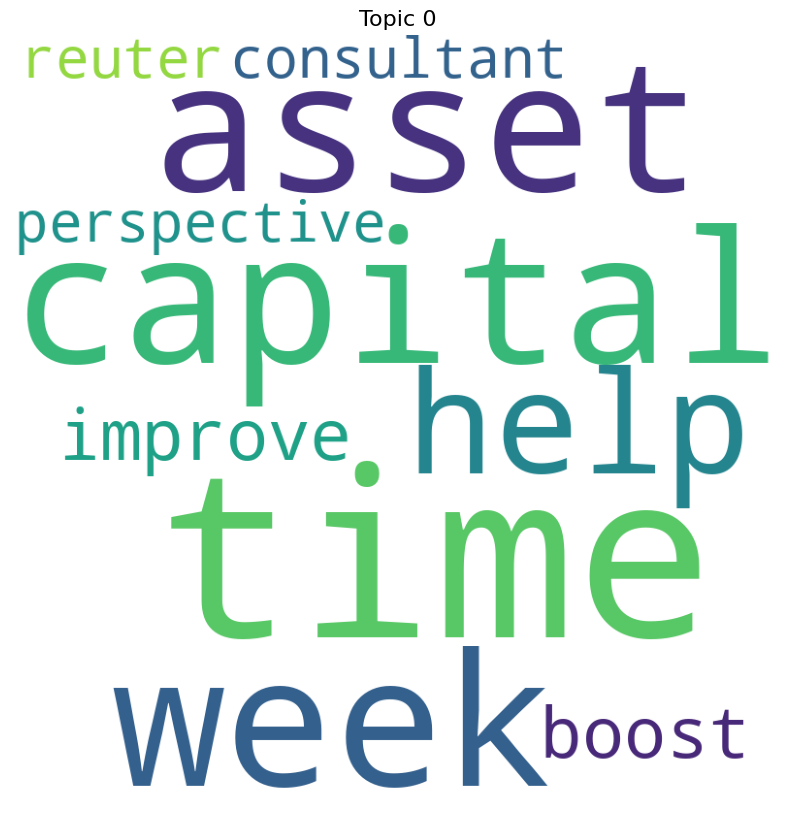

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have your LDA model (lda_model) and the corpus (corpus) ready

# Number of top words to include in each word cloud
top_n = 10

# Extract the top n words from each topic's probability distribution
topics = lda_model_tuned.show_topics(formatted=False, num_words=top_n, num_topics = num_topics)

# Create a dictionary to store top words for each topic
topic_words_dict = {}
for topic_id, topic_words in topics:
    topic_words_dict[topic_id] = [word for word, _ in topic_words]

# Create and save a word cloud for each topic
for topic_id, topic_words in topic_words_dict.items():
    wordcloud_text = ' '.join(topic_words)
    wordcloud = WordCloud(width=800, height=800, background_color='white').generate(wordcloud_text)

    # Plot the word cloud for the current topic
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.title('Topic ' + str(topic_id), fontsize=16)
    plt.axis("off")
    plt.tight_layout(pad=0)

    # Save the word cloud as a JPEG file with the topic number as filename
    filename = '/content/topics/topic_' + str(topic_id) + '.jpeg'
    plt.savefig(filename, format='jpeg')

    plt.show()


In [ ]:
# Calculate topic distribution for each document
lda_output = [lda_model_tuned.get_document_topics(doc, minimum_probability=0) for doc in corpus]

# column names
topicnames = ["Topic" + str(i) for i in range(lda_model_tuned.num_topics)]

# index names
docnames = ["Doc" + str(i) for i in range(len(data_lemmatized))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame([[round(prob, 2) for topic, prob in doc] for doc in lda_output], columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = df_document_topic.values.argmax(axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > 0.1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > 0.1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(20).style.applymap(color_green).applymap(make_bold)
df_document_topics


,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15,Topic16,Topic17,Topic18,Topic19,Topic20,Topic21,Topic22,Topic23,Topic24,Topic25,Topic26,Topic27,Topic28,Topic29,Topic30,Topic31,dominant_topic
Doc0,0.060000,0.070000,0.020000,0.020000,0.020000,0.020000,0.070000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.090000,0.020000,0.020000,0.020000,0.020000,0.020000,0.040000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.160000,0.080000,0.020000,0.020000,28
Doc1,0.040000,0.050000,0.020000,0.020000,0.020000,0.020000,0.080000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.050000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.190000,0.100000,0.020000,0.020000,28
Doc2,0.170000,0.020000,0.020000,0.020000,0.020000,0.020000,0.030000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.120000,0.020000,0.020000,0.170000,0.020000,0.020000,0
Doc3,0.090000,0.060000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.190000,0.020000,0.050000,0.110000,0.020000,0.020000,26
Doc4,0.250000,0.020000,0.020000,0.020000,0.020000,0.020000,0.030000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.050000,0.020000,0.020000,0.020000,0.020000,0.020000,0.050000,0.020000,0.020000,0.020000,0.020000,0.020000,0.160000,0.020000,0.020000,0.020000,0.020000,0.020000,0
Doc5,0.180000,0.100000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.060000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.130000,0.020000,0.020000,0
Doc6,0.290000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.130000,0.020000,0.020000,0.020000,0.020000,0.020000,0.030000,0.020000,0.020000,0.020000,0.020000,0.020000,0.040000,0.020000,0.020000,0.030000,0.020000,0.020000,0
Doc7,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.290000,0.020000,0.020000,0.020000,0.020000,0.020000,0.110000,0.020000,0.020000,0.020000,0.020000,0.020000,20
Doc8,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.130000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.090000,0.020000,0.220000,0.020000,0.020000,0.020000,28
Doc9,0.150000,0.020000,0.020000,0.020000,0.020000,0.020000,0.240000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.030000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.030000,0.020000,0.020000,6


In [ ]:
# Assuming you have the 'df_document_topics' DataFrame with the 'dominant_topic' column
topic_counts = df_document_topic['dominant_topic'].value_counts()

# Display the count of each unique dominant_topic value
print("Count of each unique dominant_topic value:")
print(topic_counts)


Count of each unique dominant_topic value:
0     2067
29    1931
26    1899
6     1614
14    1522
20     856
1      228
28     142
19      99
11      14
8        7
Name: dominant_topic, dtype: int64


In [ ]:
# Topic-Keyword Matrix
num_topics = lda_model_tuned.num_topics
num_words = len(id2word)

# Get the topic-keyword matrix using get_topics() from LdaModel
topic_keywords = lda_model_tuned.get_topics().reshape(num_topics, num_words)

# Create a DataFrame
df_topic_keywords = pd.DataFrame(topic_keywords, columns=id2word.values())

# Assign Index (Topic names)
df_topic_keywords.index = topicnames

# View
df_topic_keywords.head()


,cost,crore,currency,denomination,govt,last,make,money,note,print,...,conditioner,discrepancie,rose,backburner,meaningful,dcp,subsidize,comb,nab,highlighting
Topic0,0.000031,0.000030,0.000030,0.000028,0.000695,0.000050,0.008301,0.000162,0.000027,0.000025,...,0.000031,0.000044,0.000030,0.000056,0.000056,0.000027,0.000027,0.000100,0.000060,0.000028
Topic1,0.023558,0.000060,0.000232,0.000069,0.000085,0.000095,0.000101,0.000128,0.000073,0.000059,...,0.000054,0.000055,0.000055,0.000057,0.000057,0.000053,0.000053,0.000062,0.000055,0.000164
Topic2,0.000111,0.000107,0.000108,0.000104,0.000117,0.000119,0.000124,0.000114,0.000105,0.000103,...,0.000117,0.000119,0.000120,0.000130,0.000130,0.000113,0.000113,0.000160,0.000127,0.000118
Topic3,0.000111,0.000107,0.000108,0.000104,0.000117,0.000119,0.000124,0.000114,0.000105,0.000103,...,0.000117,0.000119,0.000120,0.000130,0.000130,0.000113,0.000113,0.000160,0.000127,0.000118
Topic4,0.000111,0.000107,0.000108,0.000104,0.000117,0.000119,0.000124,0.000114,0.000105,0.000103,...,0.000117,0.000119,0.000120,0.000130,0.000130,0.000113,0.000113,0.000160,0.000127,0.000118


In [ ]:
# Show top n keywords for each topic
def show_topics(lda_model, id2word, n_words=20):
    keywords = np.array([id2word[i] for i in range(len(id2word))])
    topic_keywords = []
    for topic_weights in lda_model.get_topics():
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords[top_keyword_locs])
    return topic_keywords

topic_keywords = show_topics(lda_model=lda_model_tuned, id2word=id2word, n_words=30)

# Topic - Keywords DataFrame
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word ' + str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic ' + str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,...,Word 20,Word 21,Word 22,Word 23,Word 24,Word 25,Word 26,Word 27,Word 28,Word 29
Topic 0,fund,company,government,debt,public,payment,set,raise,transaction,share,...,financial,case,rule,provide,include,also,small,business,sector,offer
Topic 1,market,system,rupee,cost,need,term,security,bond,dollar,borrow,...,sovereign,fraud,oil,fix,mechanism,operation,conduct,spot,weighted_average,sell
Topic 2,covid,pankaj_chaudhary,cbdc,lockdown,inoperative,tonne,sitharaman,wedding,software,quite,...,founder,crypto,cayman_island,metal,gupta,investigate,update,told_et,fine,social_security
Topic 3,covid,pankaj_chaudhary,cbdc,lockdown,inoperative,tonne,sitharaman,wedding,software,quite,...,founder,crypto,cayman_island,metal,gupta,investigate,update,told_et,fine,social_security
Topic 4,covid,pankaj_chaudhary,cbdc,lockdown,inoperative,tonne,sitharaman,wedding,software,quite,...,founder,crypto,cayman_island,metal,gupta,investigate,update,told_et,fine,social_security
Topic 5,covid,pankaj_chaudhary,cbdc,lockdown,inoperative,tonne,sitharaman,wedding,software,quite,...,founder,crypto,cayman_island,metal,gupta,investigate,update,told_et,fine,social_security
Topic 6,fiscal,government,say,finance,budget,deficit,current,estimate,target,likely,...,spending,revenue,announce,pension,financial,surplus,day,give,next,measure
Topic 7,covid,pankaj_chaudhary,cbdc,lockdown,inoperative,tonne,sitharaman,wedding,software,quite,...,founder,crypto,cayman_island,metal,gupta,investigate,update,told_et,fine,social_security
Topic 8,food,pool,grain,food_security,foodgrain,subsidize,dcp,fci,varma,aurodeep,...,headline,near_term,procurement,cpi,subsidy,macro,mute,metal,fertilizer,software
Topic 9,covid,pankaj_chaudhary,cbdc,lockdown,inoperative,tonne,sitharaman,wedding,software,quite,...,founder,crypto,cayman_island,metal,gupta,investigate,update,told_et,fine,social_security


In [ ]:
from gensim import corpora
import pandas as pd

preprocessed_documents = [lda_model_tuned.id2word.doc2bow(doc) for doc in texts]

# Get the topic distribution for each document
topic_distributions = [lda_model_tuned[doc] for doc in preprocessed_documents]

# Find the most probable topic for each document
most_probable_topics = [max(topic_dist, key=lambda x: x[1])[0] for topic_dist in topic_distributions]

# Assign the topics to the filtered_df dataframe
filtered_df['assigned_topic'] = most_probable_topics





In [ ]:
filtered_df.head()

,Headline,Summary,Content,Category,Date_Time,type_cat,Date,target,assigned_topic
0,Rs 1000 note costs govt Rs 3.17 to print,"It costs money to make money. Last year, the R...",(This story originally appeared in on Jan 01...,"[Business News, News, Economy, Finance]","Jan 01, 2012, 01:43 AM",Finance,2012-01-01,(This story originally appeared in on Jan 01...,28
1,Rs 1000 note costs govt Rs 3.17 to print,"Last year, the Reserve Bank of India spent Rs ...",(This story originally appeared in on Jan 01...,"[Business News, News, Economy, Finance]","Jan 01, 2012, 03:26 AM",Finance,2012-01-01,(This story originally appeared in on Jan 01...,28
2,Black money: Government doubles strength of fo...,The Ministry recently gave approval for creati...,NEW DELHI: As part of efforts to fight black ...,"[Business News, News, Economy, Finance]","Jan 01, 2012, 09:11 AM",Finance,2012-01-01,NEW DELHI: As part of efforts to fight black ...,0
3,Corporate governance issues too play spoilspor...,Foreign portfolio investments in Indian stock ...,MUMBAI: Overseas investors' cold shoulder to I...,"[Business News, News, Economy, Finance]","Jan 02, 2012, 11:38 PM",Finance,2012-01-02,MUMBAI: Overseas investors' cold shoulder to I...,26
4,"Government readies Rs 50,000 crore infra fund ...",The government has finalized the contours of a...,(This story originally appeared in on Jan 03...,"[Business News, News, Economy, Finance]","Jan 03, 2012, 03:57 AM",Finance,2012-01-03,(This story originally appeared in on Jan 03...,0


In [ ]:

desired_topics = [0,1,2,5,6,14,26,28]

# Create a new DataFrame containing rows with desired topics
rel_df = filtered_df[filtered_df['assigned_topic'].isin(desired_topics)]

rel_df.head()


,Headline,Summary,Content,Category,Date_Time,type_cat,Date,target,assigned_topic,topic_name
0,Rs 1000 note costs govt Rs 3.17 to print,"It costs money to make money. Last year, the R...",(This story originally appeared in on Jan 01...,"[Business News, News, Economy, Finance]","Jan 01, 2012, 01:43 AM",Finance,2012-01-01,(This story originally appeared in on Jan 01...,28,Currency Issue and Demonetization
1,Rs 1000 note costs govt Rs 3.17 to print,"Last year, the Reserve Bank of India spent Rs ...",(This story originally appeared in on Jan 01...,"[Business News, News, Economy, Finance]","Jan 01, 2012, 03:26 AM",Finance,2012-01-01,(This story originally appeared in on Jan 01...,28,Currency Issue and Demonetization
2,Black money: Government doubles strength of fo...,The Ministry recently gave approval for creati...,NEW DELHI: As part of efforts to fight black ...,"[Business News, News, Economy, Finance]","Jan 01, 2012, 09:11 AM",Finance,2012-01-01,NEW DELHI: As part of efforts to fight black ...,0,Finance and Government
3,Corporate governance issues too play spoilspor...,Foreign portfolio investments in Indian stock ...,MUMBAI: Overseas investors' cold shoulder to I...,"[Business News, News, Economy, Finance]","Jan 02, 2012, 11:38 PM",Finance,2012-01-02,MUMBAI: Overseas investors' cold shoulder to I...,26,Investment and Economic Growth
4,"Government readies Rs 50,000 crore infra fund ...",The government has finalized the contours of a...,(This story originally appeared in on Jan 03...,"[Business News, News, Economy, Finance]","Jan 03, 2012, 03:57 AM",Finance,2012-01-03,(This story originally appeared in on Jan 03...,0,Finance and Government


In [ ]:
topic_labels = {
        0: "Finance and Government",
        1: "Financial Market and Currency",
        2: "Economic Impact",
        5: "Economic Measures",
        6: "Fiscal Policy and Budgeting",
        14: "Banking and Reserve",
        26: "Investment and Economic Growth",
        28: "Currency Issue and Demonetization"

}
filtered_df['topic_name'] = filtered_df['assigned_topic'].map(topic_labels)

In [ ]:
import unicodedata
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
rel_df.shape

(7407, 10)

In [ ]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)


In [ ]:
rel_df['Content'] = rel_df['Content'].apply(round2)
rel_df['Summary'] = rel_df['Summary'].apply(round2)
rel_df['Headline'] = rel_df['Headline'].apply(round2)
rel_df['target'] = rel_df['target'].apply(round2)

<ipython-input-72-14cf1088b95f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_df['Content'] = rel_df['Content'].apply(round2)
<ipython-input-72-14cf1088b95f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_df['Summary'] = rel_df['Summary'].apply(round2)
<ipython-input-72-14cf1088b95f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [ ]:
# Remove the numbers from the news_headline
rel_df['Content'] = rel_df['Content'].apply(lambda x: re.sub(r'[^A-Za-z\s]', '', x))
rel_df['Headline'] = rel_df['Headline'].apply(lambda x: re.sub(r'[^A-Za-z\s]', '', x))
rel_df['Summary'] = rel_df['Summary'].apply(lambda x: re.sub(r'[^A-Za-z\s]', '', x))
rel_df['target'] = rel_df['target'].apply(lambda x: re.sub(r'[^A-Za-z\s]', '', x))

<ipython-input-73-699e7c886e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_df['Content'] = rel_df['Content'].apply(lambda x: re.sub(r'[^A-Za-z\s]', '', x))
<ipython-input-73-699e7c886e40>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_df['Headline'] = rel_df['Headline'].apply(lambda x: re.sub(r'[^A-Za-z\s]', '', x))
<ipython-input-73-699e7c886e40>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [ ]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [ ]:
rel_df['new_content'] = rel_df['Content'].apply(lambda x: " ".join(x.lower() for x in x.split()))
rel_df['new_summary'] = rel_df['Summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))
rel_df['new_headline'] = rel_df['Headline'].apply(lambda x: " ".join(x.lower() for x in x.split()))
rel_df['target'] = rel_df['target'].apply(lambda x: " ".join(x.lower() for x in x.split()))
rel_df['new_content'].head()

<ipython-input-75-56a6cede7ce1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_df['new_content'] = rel_df['Content'].apply(lambda x: " ".join(x.lower() for x in x.split()))
<ipython-input-75-56a6cede7ce1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_df['new_summary'] = rel_df['Summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))
<ipython-input-75-56a6cede7ce1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

0    this story originally appeared in on jan mumba...
1    this story originally appeared in on jan mumba...
2    new delhi as part of efforts to fight black mo...
3    mumbai overseas investors cold shoulder to ind...
4    this story originally appeared in on jan new d...
Name: new_content, dtype: object

In [ ]:
rel_df['new_content'] = rel_df['new_content'].str.replace('[^\w\s]','')
rel_df['new_summary'] = rel_df['new_summary'].str.replace('[^\w\s]','')
rel_df['new_headline'] = rel_df['new_headline'].str.replace('[^\w\s]','')
rel_df['target'] = rel_df['target'].str.replace('[^\w\s]','')
rel_df['new_content'].head()

<ipython-input-76-2b7e46decf37>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  rel_df['new_content'] = rel_df['new_content'].str.replace('[^\w\s]','')
<ipython-input-76-2b7e46decf37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_df['new_content'] = rel_df['new_content'].str.replace('[^\w\s]','')
<ipython-input-76-2b7e46decf37>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  rel_df['new_summary'] = rel_df['new_summary'].str.replace('[^\w\s]','')
<ipython-input-76-2b7e46decf37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

0    this story originally appeared in on jan mumba...
1    this story originally appeared in on jan mumba...
2    new delhi as part of efforts to fight black mo...
3    mumbai overseas investors cold shoulder to ind...
4    this story originally appeared in on jan new d...
Name: new_content, dtype: object

In [ ]:
stop = stopwords.words('english')
rel_df['new_content'] = rel_df['new_content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
rel_df['new_summary'] = rel_df['new_summary'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
rel_df['new_headline'] = rel_df['new_headline'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
rel_df['target'] = rel_df['target'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
rel_df.head(20)

<ipython-input-77-9fe55419ddb8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_df['new_content'] = rel_df['new_content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
<ipython-input-77-9fe55419ddb8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_df['new_summary'] = rel_df['new_summary'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
<ipython-input-77-9fe55419ddb8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

,Headline,Summary,Content,Category,Date_Time,type_cat,Date,target,assigned_topic,topic_name,new_content,new_summary,new_headline
0,Rs note costs govt Rs to print,It costs money to make money Last year the Res...,This story originally appeared in on Jan M...,"[Business News, News, Economy, Finance]","Jan 01, 2012, 01:43 AM",Finance,2012-01-01,story originally appeared jan mumbai costs mon...,28,Currency Issue and Demonetization,story originally appeared jan mumbai costs mon...,costs money make money last year reserve bank ...,rs note costs govt rs print
1,Rs note costs govt Rs to print,Last year the Reserve Bank of India spent Rs ...,This story originally appeared in on Jan M...,"[Business News, News, Economy, Finance]","Jan 01, 2012, 03:26 AM",Finance,2012-01-01,story originally appeared jan mumbai costs mon...,28,Currency Issue and Demonetization,story originally appeared jan mumbai costs mon...,last year reserve bank india spent rs crore pr...,rs note costs govt rs print
2,Black money Government doubles strength of for...,The Ministry recently gave approval for creati...,NEW DELHI As part of efforts to fight black m...,"[Business News, News, Economy, Finance]","Jan 01, 2012, 09:11 AM",Finance,2012-01-01,new delhi part efforts fight black money gover...,0,Finance and Government,new delhi part efforts fight black money gover...,ministry recently gave approval creating new u...,black money government doubles strength foreig...
3,Corporate governance issues too play spoilspor...,Foreign portfolio investments in Indian stock ...,MUMBAI Overseas investors cold shoulder to Ind...,"[Business News, News, Economy, Finance]","Jan 02, 2012, 11:38 PM",Finance,2012-01-02,mumbai overseas investors cold shoulder india ...,26,Investment and Economic Growth,mumbai overseas investors cold shoulder india ...,foreign portfolio investments indian stock deb...,corporate governance issues play spoilsport fu...
4,Government readies Rs crore infra fund plan,The government has finalized the contours of a...,This story originally appeared in on Jan N...,"[Business News, News, Economy, Finance]","Jan 03, 2012, 03:57 AM",Finance,2012-01-03,story originally appeared jan new delhi govern...,0,Finance and Government,story originally appeared jan new delhi govern...,government finalized contours billion rs crore...,government readies rs crore infra fund plan
5,India wants to pay for Iranian crude in rupees,Fearing that fresh US sanctions may block a si...,NEW DELHI Fearing that fresh US sanctions may ...,"[Business News, News, Economy, Finance]","Jan 08, 2012, 07:09 AM",Finance,2012-01-08,new delhi fearing fresh us sanctions may block...,0,Finance and Government,new delhi fearing fresh us sanctions may block...,fearing fresh us sanctions may block sixmontho...,india wants pay iranian crude rupees
6,IT department gets wary about secret bank acco...,In order to guard against possible leakage of ...,NEW DELHI In order to guard against possible l...,"[Business News, News, Economy, Finance]","Jan 08, 2012, 07:48 AM",Finance,2012-01-08,new delhi order guard possible leakage names f...,0,Finance and Government,new delhi order guard possible leakage names f...,order guard possible leakage names figuring se...,department gets wary secret bank account names...
8,New currency security features to reduce count...,Reforms for improving security features in not...,DEWAS MADHYA PRADESH Reforms for improving sec...,"[Business News, News, Economy, Finance]","Jan 07, 2012, 04:17 PM",Finance,2012-01-07,dewas madhya pradesh reforms improving securit...,28,Currency Issue and Demonetization,dewas madhya pradesh reforms improving securit...,reforms improving security features notes coin...,new currency security features reduce counterf...
9,Government defers decision on disinvestment pr...,The Cabinet on Wednesday deferred a decision o...,NEW DELHI The Cabinet on Wednesday deferred a ...,"[Business News, News, Economy, Finance]","Jan 04, 2012, 09:30 PM",Finance,2012-01-04,new delh

In [ ]:
def space(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])
rel_df['new_content']= rel_df['new_content'].apply(space)
rel_df['new_summary']= rel_df['new_summary'].apply(space)
rel_df['new_headline']= rel_df['new_headline'].apply(space)
rel_df['target']= rel_df['target'].apply(space)
rel_df.head(20)

<ipython-input-78-8bb7ec24cf18>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_df['new_content']= rel_df['new_content'].apply(space)
<ipython-input-78-8bb7ec24cf18>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_df['new_summary']= rel_df['new_summary'].apply(space)
<ipython-input-78-8bb7ec24cf18>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

,Headline,Summary,Content,Category,Date_Time,type_cat,Date,target,assigned_topic,topic_name,new_content,new_summary,new_headline
0,Rs note costs govt Rs to print,It costs money to make money Last year the Res...,This story originally appeared in on Jan M...,"[Business News, News, Economy, Finance]","Jan 01, 2012, 01:43 AM",Finance,2012-01-01,story originally appear jan mumbai cost money ...,28,Currency Issue and Demonetization,story originally appear jan mumbai cost money ...,cost money make money last year reserve bank i...,r note cost govt rs print
1,Rs note costs govt Rs to print,Last year the Reserve Bank of India spent Rs ...,This story originally appeared in on Jan M...,"[Business News, News, Economy, Finance]","Jan 01, 2012, 03:26 AM",Finance,2012-01-01,story originally appear jan mumbai cost money ...,28,Currency Issue and Demonetization,story originally appear jan mumbai cost money ...,last year reserve bank india spend rs crore pr...,r note cost govt rs print
2,Black money Government doubles strength of for...,The Ministry recently gave approval for creati...,NEW DELHI As part of efforts to fight black m...,"[Business News, News, Economy, Finance]","Jan 01, 2012, 09:11 AM",Finance,2012-01-01,new delhi part effort fight black money govern...,0,Finance and Government,new delhi part effort fight black money govern...,ministry recently give approval create new uni...,black money government double strength foreign...
3,Corporate governance issues too play spoilspor...,Foreign portfolio investments in Indian stock ...,MUMBAI Overseas investors cold shoulder to Ind...,"[Business News, News, Economy, Finance]","Jan 02, 2012, 11:38 PM",Finance,2012-01-02,mumbai overseas investor cold shoulder india m...,26,Investment and Economic Growth,mumbai overseas investor cold shoulder india m...,foreign portfolio investment indian stock debt...,corporate governance issue play spoilsport fun...
4,Government readies Rs crore infra fund plan,The government has finalized the contours of a...,This story originally appeared in on Jan N...,"[Business News, News, Economy, Finance]","Jan 03, 2012, 03:57 AM",Finance,2012-01-03,story originally appear jan new delhi governme...,0,Finance and Government,story originally appear jan new delhi governme...,government finalize contour billion r crore in...,government ready rs crore infra fund plan
5,India wants to pay for Iranian crude in rupees,Fearing that fresh US sanctions may block a si...,NEW DELHI Fearing that fresh US sanctions may ...,"[Business News, News, Economy, Finance]","Jan 08, 2012, 07:09 AM",Finance,2012-01-08,new delhi fear fresh us sanction may block six...,0,Finance and Government,new delhi fear fresh us sanction may block six...,fear fresh us sanction may block sixmonthold c...,india want pay iranian crude rupee
6,IT department gets wary about secret bank acco...,In order to guard against possible leakage of ...,NEW DELHI In order to guard against possible l...,"[Business News, News, Economy, Finance]","Jan 08, 2012, 07:48 AM",Finance,2012-01-08,new delhi order guard possible leakage name fi...,0,Finance and Government,new delhi order guard possible leakage name fi...,order guard possible leakage name figure secre...,department get wary secret bank account name a...
8,New currency security features to reduce count...,Reforms for improving security features in not...,DEWAS MADHYA PRADESH Reforms for improving sec...,"[Business News, News, Economy, Finance]","Jan 07, 2012, 04:17 PM",Finance,2012-01-07,dewa madhya pradesh reform improve security fe...,28,Currency Issue and Demonetization,dewa madhya pradesh reform improve security fe...,reform improve security feature note coin ensu...,new currency security feature reduce counterfe...
9,Government defers decision on disinvestment pr...,The Cabinet on Wednesday deferred a decision o...,NEW DELHI The Cabinet on Wednesday deferred a ...,"[Business News, News, Economy, Finance]","Jan 04, 2012, 09:30 PM",Finance,2012-01-04,new delhi cabine

In [ ]:
rel_df['new_content'][1239]

'promise big return keep global risk capital investor tie india three year fray many private equity venture fund struggle deploy unused capital high valuation few exit much money chase deal across countrys riskcapital industry bracing change year blockbuster deal cede spotlight angel seed capital investment investor prefer nurture raw entrepreneur great idea fund size reduce niche specialise fund set limited partner provide money risk capital firm seek hedge bet volatile market invest private equity fund might still make investment venture capital fund say chris loh partner axiom asia singaporebase investment firm provide capital seven fund invest india include helion venture partner loh say trouble buffet indian risk capital industry unique face global slowdown big problem perception headline negative issue investor prefer part asia equally attractive despite decline nearly fifth deal flow value industry expert argue danger flight capital however shift large general fund niche fund fo

In [ ]:

# Assuming you have a DataFrame named 'rel_df'

# Define the file path where you want to save the CSV file
csv_file_path = 'output_file.csv'

# Save the DataFrame to a CSV file
rel_df.to_csv(csv_file_path, index=False)

print(f"DataFrame saved to {csv_file_path}")


DataFrame saved to output_file.csv


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Filter the DataFrame for rows where assigned_topic is 1
new_df = rel_df[rel_df['assigned_topic'] == 1]

# Concatenate the text data from the filtered DataFrame
text = ' '.join(new_df['new_content'])

# Tokenize the text into words
words = text.split()

# Count word frequencies
word_freq = Counter(words)

# Get the top 10 most common words
top_words = word_freq.most_common(10)

# Create a dictionary of word frequencies for WordCloud
wordcloud_dict = {word: freq for word, freq in top_words}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_dict)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Top 10 Words (Assigned Topic 1)')
plt.show()
